In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium

In [2]:
dane_gus_liczba_krow_file ='/Users/Jagoda/Desktop/Article/ROLN_1440_CTAB_20210324224825.csv'
dane_gus_ilosc_mleka_file ='/Users/Jagoda/Desktop/Article/ROLN_1444_CTAB_20210324225013.csv'

In [3]:
liczba_krow_gus = pd.read_csv(dane_gus_liczba_krow_file, delimiter=';')
liczba_krow_gus.head()

,Kod,Nazwa,ogółem;bydło w wieku 2 lat i więcej krowy mleczne;2018;[szt.],Unnamed: 3
0,0,POLSKA,2214084,NaN
1,200000,DOLNOŚLĄSKIE,25448,NaN
2,400000,KUJAWSKO-POMORSKIE,149895,NaN
3,600000,LUBELSKIE,124432,NaN
4,800000,LUBUSKIE,13972,NaN


In [4]:
liczba_krow_gus = liczba_krow_gus.iloc[:, 0:3]
liczba_krow_gus.columns = ['TERYT', 'Nazwa', 'liczba_krow']
liczba_krow_gus.head()

,TERYT,Nazwa,liczba_krow
0,0,POLSKA,2214084
1,200000,DOLNOŚLĄSKIE,25448
2,400000,KUJAWSKO-POMORSKIE,149895
3,600000,LUBELSKIE,124432
4,800000,LUBUSKIE,13972


In [5]:
ilosc_mleka_gus = pd.read_csv(dane_gus_ilosc_mleka_file, delimiter=';')
ilosc_mleka_gus.head()

,Kod,Nazwa,ogółem;tys. litrów;2018;[tys. l],Unnamed: 3
0,0,POLSKA,13767758,NaN
1,200000,DOLNOŚLĄSKIE,182950,NaN
2,400000,KUJAWSKO-POMORSKIE,1047783,NaN
3,600000,LUBELSKIE,777071,NaN
4,800000,LUBUSKIE,108094,NaN


In [6]:
ilosc_mleka_gus = ilosc_mleka_gus.iloc[:, [0, 2]]
ilosc_mleka_gus.columns = ['TERYT', 'ilosc_mleka']
ilosc_mleka_gus.head()

,TERYT,ilosc_mleka
0,0,13767758
1,200000,182950
2,400000,1047783
3,600000,777071
4,800000,108094


In [7]:
# łączymy dane ze sobą - tylko te kody TERYT, które istnieją w obu tabelach
dane_gus = pd.merge(liczba_krow_gus, ilosc_mleka_gus, how='inner', on='TERYT')

# liczymy stopę bezrobocia w każdym z TERYTów:
dane_gus['Wydajnosc_mleczna'] = dane_gus['ilosc_mleka'] / dane_gus['liczba_krow']

# 10 przykładowych wierszy:
dane_gus.sample(10)

,TERYT,Nazwa,liczba_krow,ilosc_mleka,Wydajnosc_mleczna
9,1800000,PODKARPACKIE,40068,180031,4.493137
13,2600000,ŚWIĘTOKRZYSKIE,48749,236385,4.849023
7,1400000,MAZOWIECKIE,503899,3024838,6.002866
15,3000000,WIELKOPOLSKIE,269382,1838495,6.824862
0,0,POLSKA,2214084,13767758,6.218264
14,2800000,WARMIŃSKO-MAZURSKIE,174835,1134274,6.487683
5,1000000,ŁÓDZKIE,175375,1029976,5.872992
6,1200000,MAŁOPOLSKIE,79314,314427,3.964332
2,400000,KUJAWSKO-POMORSKIE,149895,1047783,6.990113
12,2400000,ŚLĄSKIE,42039,253557,6.031471


In [8]:
# mapa z województwami:
mapa_woj = gpd.read_file('/Users/Jagoda/Desktop/Article/Dane_administracyjne_Polska/Wojewodztwa.shp')
mapa_woj.dtypes

JPT_SJR_KO      object
JPT_KOD_JE      object
JPT_NAZWA_      object
JPT_ORGAN_      object
JPT_JOR_ID       int64
WERSJA_OD       object
WERSJA_DO       object
WAZNY_OD        object
WAZNY_DO        object
JPT_KOD__1      object
JPT_NAZWA1      object
JPT_ORGAN1      object
JPT_WAZNA_      object
ID_BUFORA_     float64
ID_BUFORA1     float64
ID_TECHNIC       int64
IIP_PRZEST      object
IIP_IDENTY      object
IIP_WERSJA      object
JPT_KJ_IIP      object
JPT_KJ_I_1      object
JPT_KJ_I_2      object
JPT_OPIS        object
JPT_SPS_KO      object
ID_BUFOR_1       int64
JPT_ID           int64
JPT_KJ_I_3      object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [9]:
# mapa z gminami:
mapa_gmn = gpd.read_file('/Users/Jagoda/Desktop/Article/Dane_administracyjne_Polska/Gminy.shp')
mapa_gmn.dtypes

JPT_SJR_KO      object
JPT_KOD_JE      object
JPT_NAZWA_      object
JPT_ORGAN_      object
JPT_JOR_ID       int64
WERSJA_OD       object
WERSJA_DO       object
WAZNY_OD        object
WAZNY_DO        object
JPT_KOD__1      object
JPT_NAZWA1      object
JPT_ORGAN1      object
JPT_WAZNA_      object
ID_BUFORA_     float64
ID_BUFORA1     float64
ID_TECHNIC       int64
IIP_PRZEST      object
IIP_IDENTY      object
IIP_WERSJA      object
JPT_KJ_IIP      object
JPT_KJ_I_1      object
JPT_KJ_I_2      object
JPT_OPIS        object
JPT_SPS_KO      object
ID_BUFOR_1       int64
JPT_ID           int64
JPT_KJ_I_3      object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [10]:
mapa_woj = mapa_woj[['JPT_KOD_JE', "geometry"]]
 
mapa_gmn = mapa_gmn[['JPT_KOD_JE', "geometry"]]
mapa_gmn.head()

,JPT_KOD_JE,geometry
0,3018012,"POLYGON ((18.32631 51.41982, 18.32570 51.42005..."
1,3019032,"POLYGON ((16.88429 53.05023, 16.88398 53.05024..."
2,3019011,"POLYGON ((16.74143 53.06633, 16.74090 53.06652..."
3,3019093,"POLYGON ((17.07328 53.14230, 17.07323 53.14236..."
4,3019073,"POLYGON ((16.73939 53.06732, 16.73988 53.06706..."


In [40]:
# kod ma być stringiem o stałejdługości (dodanie wiodących zer)
dane_gus['TERYT_gmn'] = dane_gus.TERYT.apply(lambda x: '0'+str(x) if len(str(x)) < 7 else str(x))
 
# TERYT województwa
dane_gus['TERYT_woj'] = dane_gus.TERYT_gmn.apply(lambda s: s[:2])
 
dane_gus.head(10)

,TERYT,Nazwa,liczba_krow,ilosc_mleka,Wydajnosc_mleczna,TERYT_gmn,TERYT_woj
0,0,POLSKA,2214084,13767758,6.218264,00,00
1,200000,DOLNOŚLĄSKIE,25448,182950,7.189170,0200000,02
2,400000,KUJAWSKO-POMORSKIE,149895,1047783,6.990113,0400000,04
3,600000,LUBELSKIE,124432,777071,6.244945,0600000,06
4,800000,LUBUSKIE,13972,108094,7.736473,0800000,08
5,1000000,ŁÓDZKIE,175375,1029976,5.872992,1000000,10
6,1200000,MAŁOPOLSKIE,79314,314427,3.964332,1200000,12
7,1400000,MAZOWIECKIE,503899,3024838,6.002866,1400000,14
8,1600000,OPOLSKIE,40752,290528,7.129172,1600000,16
9,1800000,PODKARPACKIE,40068,180031,4.493137,1800000,18


In [12]:
# usuwamy wiersz dla całego kraju:
dane_gus = dane_gus[dane_gus['TERYT'] != '0']
 
# wybieramy same województwa - 00000 na końcu
dane_gus_woj = dane_gus[dane_gus.TERYT_gmn.str[2:7] == '00000']
dane_gus_woj

,TERYT,Nazwa,liczba_krow,ilosc_mleka,Wydajnosc_mleczna,TERYT_gmn,TERYT_woj
1,200000,DOLNOŚLĄSKIE,25448,182950,7.189170,0200000,02
2,400000,KUJAWSKO-POMORSKIE,149895,1047783,6.990113,0400000,04
3,600000,LUBELSKIE,124432,777071,6.244945,0600000,06
4,800000,LUBUSKIE,13972,108094,7.736473,0800000,08
5,1000000,ŁÓDZKIE,175375,1029976,5.872992,1000000,10
6,1200000,MAŁOPOLSKIE,79314,314427,3.964332,1200000,12
7,1400000,MAZOWIECKIE,503899,3024838,6.002866,1400000,14
8,1600000,OPOLSKIE,40752,290528,7.129172,1600000,16
9,1800000,PODKARPACKIE,40068,180031,4.493137,1800000,18
10,2000000,PODLASKIE,442848,2834894,6.401506,2000000,20


In [13]:
# wybieramy same gminy - 00000 na końcu
dane_gus_gmn = dane_gus[dane_gus.TERYT_gmn.str[4:7] != '00']
dane_gus_gmn

,TERYT,Nazwa,liczba_krow,ilosc_mleka,Wydajnosc_mleczna,TERYT_gmn,TERYT_woj
0,0,POLSKA,2214084,13767758,6.218264,00,00
1,200000,DOLNOŚLĄSKIE,25448,182950,7.189170,0200000,02
2,400000,KUJAWSKO-POMORSKIE,149895,1047783,6.990113,0400000,04
3,600000,LUBELSKIE,124432,777071,6.244945,0600000,06
4,800000,LUBUSKIE,13972,108094,7.736473,0800000,08
5,1000000,ŁÓDZKIE,175375,1029976,5.872992,1000000,10
6,1200000,MAŁOPOLSKIE,79314,314427,3.964332,1200000,12
7,1400000,MAZOWIECKIE,503899,3024838,6.002866,1400000,14
8,1600000,OPOLSKIE,40752,290528,7.129172,1600000,16
9,1800000,PODKARPACKIE,40068,180031,4.493137,1800000,18


In [14]:
# łączymy tabelę opisującą kształt województw z danymi o bezrobosiu w województwach
dane_mapa_woj = pd.merge(mapa_woj, dane_gus_woj, how='left', left_on='JPT_KOD_JE', right_on='TERYT_woj')
dane_mapa_woj

,JPT_KOD_JE,geometry,TERYT,Nazwa,liczba_krow,ilosc_mleka,Wydajnosc_mleczna,TERYT_gmn,TERYT_woj
0,24,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51...",2400000,ŚLĄSKIE,42039,253557,6.031471,2400000,24
1,16,"POLYGON ((17.81203 51.18669, 17.81209 51.18670...",1600000,OPOLSKIE,40752,290528,7.129172,1600000,16
2,26,"POLYGON ((19.70430 50.75239, 19.70443 50.75248...",2600000,ŚWIĘTOKRZYSKIE,48749,236385,4.849023,2600000,26
3,22,"POLYGON ((17.66483 54.78297, 17.66653 54.78334...",2200000,POMORSKIE,59552,363479,6.103557,2200000,22
4,20,"POLYGON ((21.98108 52.97859, 21.98078 52.97861...",2000000,PODLASKIE,442848,2834894,6.401506,2000000,20
5,32,"POLYGON ((14.81157 54.04037, 14.89525 54.05570...",3200000,ZACHODNIOPOMORSKIE,23522,150976,6.418502,3200000,32
6,02,"POLYGON ((15.10534 51.42730, 15.10540 51.42732...",200000,DOLNOŚLĄSKIE,25448,182950,7.189170,0200000,02
7,30,"POLYGON ((16.71447 53.29913, 16.71447 53.29920...",3000000,WIELKOPOLSKIE,269382,1838495,6.824862,3000000,30
8,18,"POLYGON ((22.03538 50.80675, 22.03550 50.80681...",1800000,PODKARPACKIE,40068,180031,4.493137,1800000,18
9,12,"POLYGON ((19.97230 50.51625, 19.97227 50.51633...",1200000,MAŁOPOLSKIE,79314,314427,3.964332,1200000,12


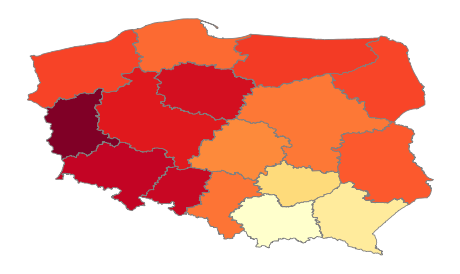

In [15]:
## rysujemy mapkę:
# wielkość naszego obrazka
fig, ax = plt.subplots(1, figsize = (8,8))
 
# rysowanie mapy
dane_mapa_woj.plot(column='Wydajnosc_mleczna', ax=ax, cmap='YlOrRd', linewidth=0.8, edgecolor='gray')
 
# usuwamy osie
ax.axis('off')
 
# pokazujemy obrazek
plt.show()

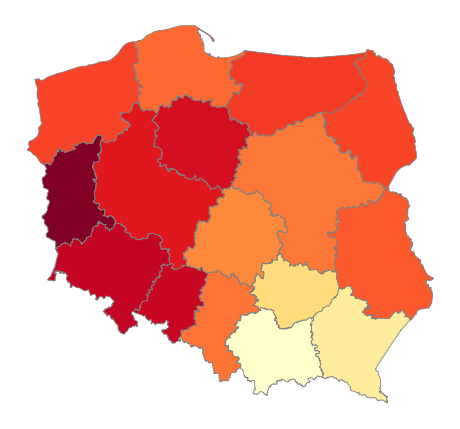

In [16]:
dane_mapa_woj = dane_mapa_woj.to_crs(epsg=2180)
 
fig, ax = plt.subplots(1, figsize = (8,8))
dane_mapa_woj.plot(column='Wydajnosc_mleczna', ax=ax, cmap='YlOrRd', linewidth=0.8, edgecolor='gray')
ax.axis('off')
plt.show()

In [32]:
# uproszczenie geometrii
mapa_woj.geometry = mapa_woj.geometry.simplify(0.005) # mniejsza wartosc = bardziej dokładnie
 
# dane do GeOJSON na potrzeby Folium
woj_geoPath = mapa_woj.to_json()

In [38]:
# 52,19 to w przybliżeniu środek mapy w postaci lat,long
mapa = folium.Map([52, 19], zoom_start=6)
 
folium.Choropleth(geo_data=woj_geoPath, # GeJSON z danymi geograficznymi obszarów
                  data=dane_gus_woj, # data frame z danymi do pokazania
                  columns=['TERYT_woj', 'Wydajnosc_mleczna'], # kolumna z kluczem, kolumna z wartościami
                  key_on='feature.properties.JPT_KOD_JE', # gdzie jests klucz w GeoJSON?
                  fill_color='YlOrRd', 
                  fill_opacity=0.4,
                  line_opacity=0.6,
                  legend_name="Wydajność mleczna w województwie").add_to(mapa)
 
# zapisanie utworzonej mapy do pliku HTML
mapa.save(outfile = 'wydajnosc_mleczna_wojewodztwo.html')
 
# pokazujemy mapę
mapa